In [1]:
from os import listdir, rename
from os.path import isfile, join
from shutil import copyfile

import cv2
import numpy as np

import cPickle as pickle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from ball_detect_utils import hsv_to_bool_mask
from ball_detect_utils import hsv_to_circular_bool_mask

In [2]:
def jaccard(im_mask_pd, im_mask_gt):
    """
    - both input must be bool
    - return between 0 to 1, 1 the best
    """
    assert im_mask_pd.dtype == np.bool
    assert im_mask_gt.dtype == np.bool
    union = float(np.sum(np.logical_or(im_mask_pd, im_mask_gt)))
    interset = float(np.sum(np.logical_and(im_mask_pd, im_mask_gt)))
    if union == 0: 
        return 0.
    return interset / union

In [3]:
data = pickle.load(open("data.p", "rb"))

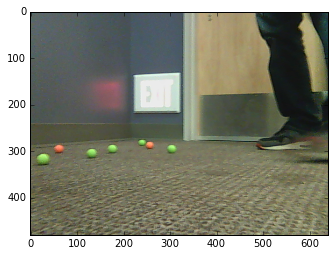

In [4]:
k = data.keys()[100]
plt.imshow(data[k]['im'])

0.513020833333


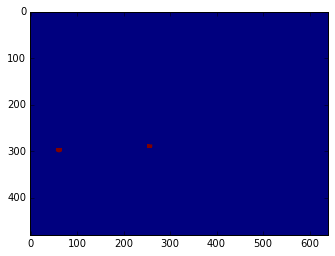

In [5]:
im_hsv = cv2.cvtColor(data[k]['im_bgr'], cv2.COLOR_BGR2HSV)
hsv_lows = (0, 146, 120)
hsv_highs = (16, 255, 255)
im_mask_pd = hsv_to_bool_mask(im_hsv, hsv_lows, hsv_highs)
print jaccard(im_mask_pd, data[k]['im_mask_orange'])
plt.imshow(im_mask_pd)

0.581863979849


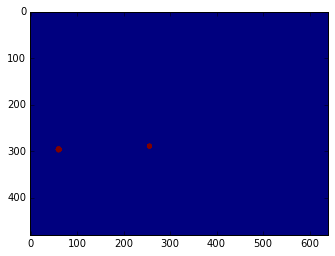

In [6]:
im_hsv = cv2.cvtColor(data[k]['im_bgr'], cv2.COLOR_BGR2HSV)
hsv_lows = (0, 146, 120)
hsv_highs = (16, 255, 255)
im_mask_pd = hsv_to_circular_bool_mask(im_hsv, hsv_lows, hsv_highs)
print jaccard(im_mask_pd, data[k]['im_mask_orange'])
plt.imshow(im_mask_pd)